In [55]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torchvision
import numpy as np
from torchvision import transforms
from PIL import Image

In [56]:
image = Image.open('Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png')
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))
list_path = ['Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', 'Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ.png', 'Proj1.2/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png', 'Proj1.2/1_zd6ypc20QAIFMzrbCmJRMg.png']
num_images = len(list_path)
num_columns = (num_images + 1) // 2  # Ceiling division for columns
num_rows = 2
rows, cols = h,w

Width: 461, Height: 461
<class 'PIL.PngImagePlugin.PngImageFile'>


### 0. Colored Images

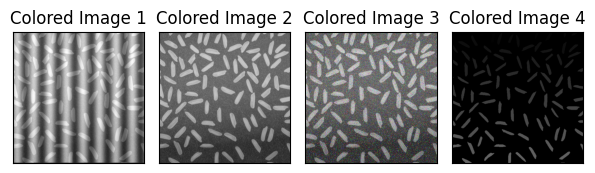

In [57]:
plt.figure(figsize=(6,6))
for i in range(num_images):
    plt.subplot(num_rows-1, num_columns*2, i + 1)
    plt.imshow(cv2.imread(list_path[i]), cmap='gray',)
    plt.title(f'Colored Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 1.Gray Images

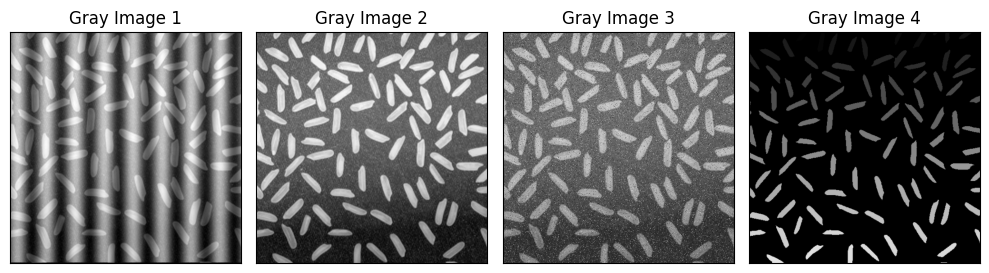

In [58]:
gray_img_list = []
for i in range(len(list_path)):
    image = cv2.imread(list_path[i])
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_img_list.append(image_gray)

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows//2, num_columns*2, i + 1)
    plt.imshow(gray_img_list[i], cmap='gray',)
    plt.title(f'Gray Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 2.Remove stripes

Min:0 Max:255
Min:0 Max:255
Min:0 Max:255
Min:0 Max:255


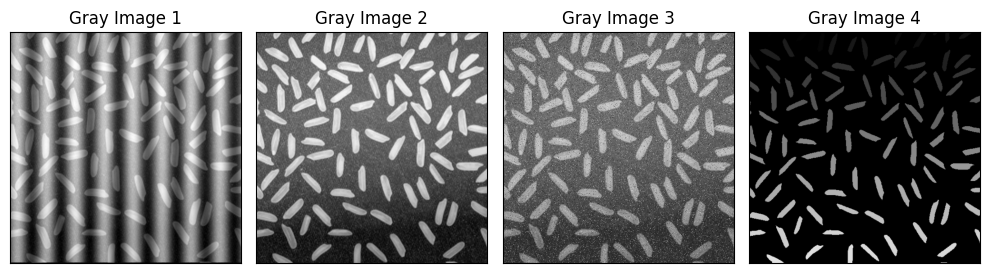

In [59]:
import copy

def stretching_histogram(image):
    x_min = image.min()
    x_max = image.max()
    normalized_image = ((image - x_min) / (x_max - x_min) * 255).astype(np.uint8)
    return normalized_image
gray_img_list = [stretching_histogram(img) for img in gray_img_list]

gray_img_list_copy = [copy.deepcopy(i) for i in gray_img_list]
for i in gray_img_list_copy:
    print(f"Min:{i.min()}", f"Max:{i.max()}")
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows-1, num_columns*2, i + 1)
    plt.imshow(gray_img_list[i], cmap='gray',)
    plt.title(f'Gray Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

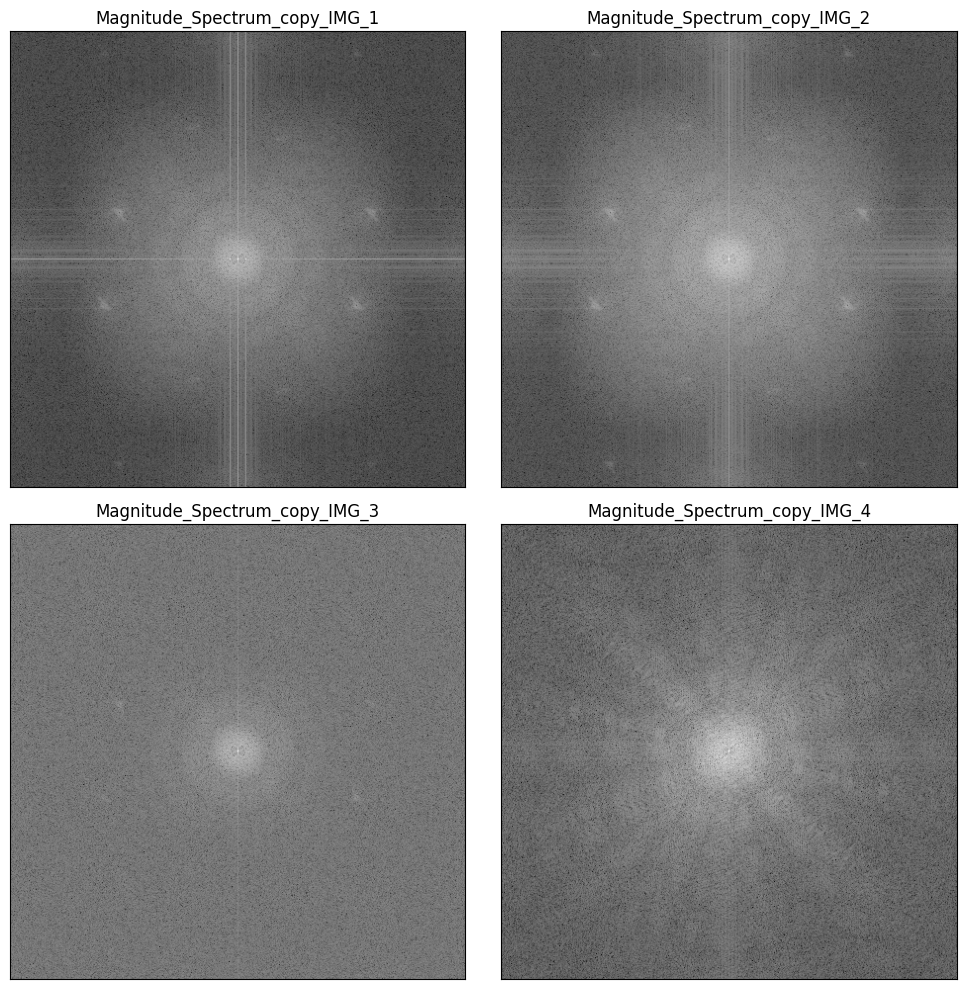

In [60]:
plt.figure(figsize=(10, 10))
dft_shift_list_copy = []
dft_shift_list = []
magnitude_spectrum_list_copy = []
magnitude_spectrum_list = []

for i in range(num_images):
    dft_copy = cv2.dft(np.float64(gray_img_list_copy[i]), flags=cv2.DFT_COMPLEX_OUTPUT)                     # biến đổi Fourier để chuyển đổi ảnh sang miền tần số
    dft_shift = np.fft.fftshift(dft_copy)                                                                   # dịch chuyển tần số gốc về trung tâm để dễ dàng xử lý
    dft_shift_list_copy.append(dft_shift)                                               
    dft_shift_list.append(dft_shift)
    
    '''quan sát magnitude spectrum các ảnh copy'''
    magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))                      # độ lớn phổ, phần thực + phần ảo
    magnitude_spectrum_list_copy.append(magnitude_spectrum)
    magnitude_spectrum_list.append(magnitude_spectrum)
    
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'Magnitude_Spectrum_copy_IMG_{i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


#### Tiến hành bỏ điểm siêu sáng ở giữa


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


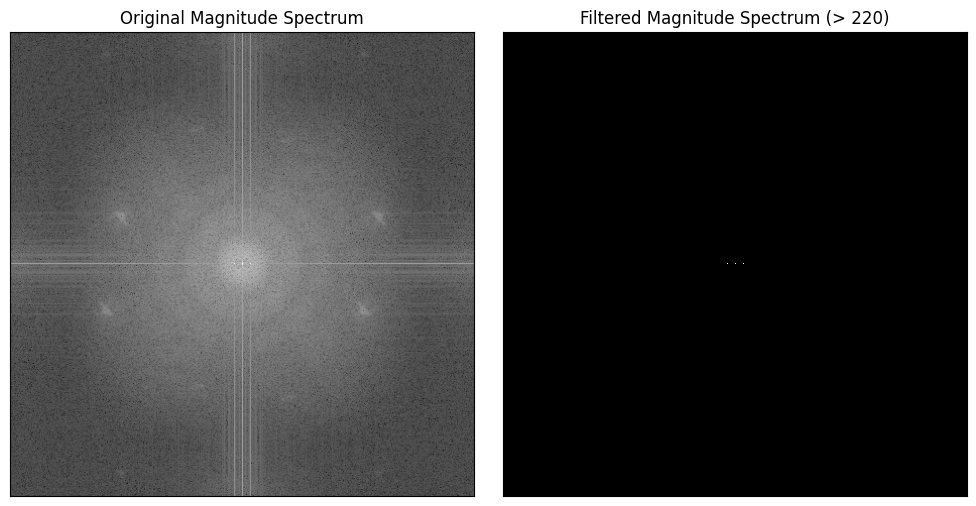

In [61]:
dft = cv2.dft(np.float64(gray_img_list_copy[0]), flags=cv2.DFT_COMPLEX_OUTPUT)                                    # biến đổi Fourier để chuyển đổi ảnh sang miền tần số   
dft_shift = np.fft.fftshift(dft)                                                                                  # dịch chuyển tần số gốc về trung tâm để dễ dàng xử lý
threshold = 220 
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))                                # độ lớn phổ, phần thực + phần ảo
magnitude_spectrum_nor = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)                         # chuyển về 0->255 để đặt ngưỡng cho dễ


mask = magnitude_spectrum_nor > threshold
print(mask)

# Tạo một hình ảnh mới để hiển thị các điểm được giữ lại
filtered_magnitude_spectrum_nor = np.zeros_like(magnitude_spectrum_nor)
filtered_magnitude_spectrum_nor[mask] = magnitude_spectrum_nor[mask]

filtered_magnitude_spectrum = np.log(filtered_magnitude_spectrum_nor + 1)                                         # quay về log cho đồng bộ, + 1 đề phòng trường hợp log 0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.xticks([]), plt.yticks([])


plt.subplot(1, 2, 2)
plt.imshow(filtered_magnitude_spectrum, cmap='gray')
plt.title('Filtered Magnitude Spectrum (> 220)')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


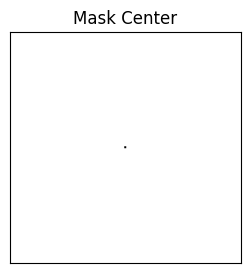

In [62]:
''' việc bỏ điêm sáng ở giữa đi để khi tiến hành lấy ngưỡng các điểm sáng, sau đó lấy ảnh gốc trừ các điểm sáng còn lại sẽ ít bị ảnh hưởng bởi điểm trung tâm'''
mask_center = np.ones((rows, cols, 2), np.uint8)
mask_center[int(rows*0.495):int(rows*0.505),int(cols*0.495):int(cols*0.505)] = 0
mask_center_new = mask_center[:, :, 0]
plt.figure(figsize=(3,3))
plt.imshow(mask_center_new, cmap='gray')

plt.title('Mask Center')
plt.xticks([]), plt.yticks([])
plt.show()


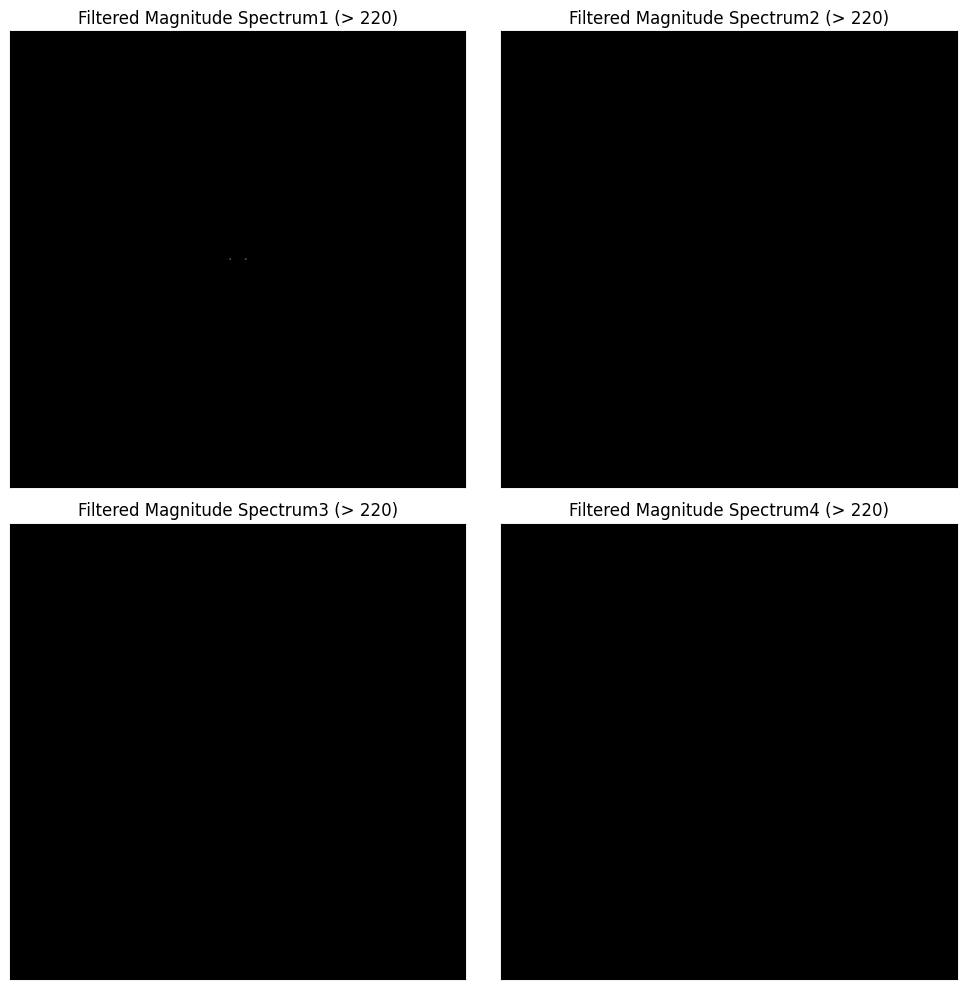

Shape of magnitude_spectrum[i]: (461, 461)
Shape of filtered_magnitude_spectrum_remove_center[i]: (461, 461)


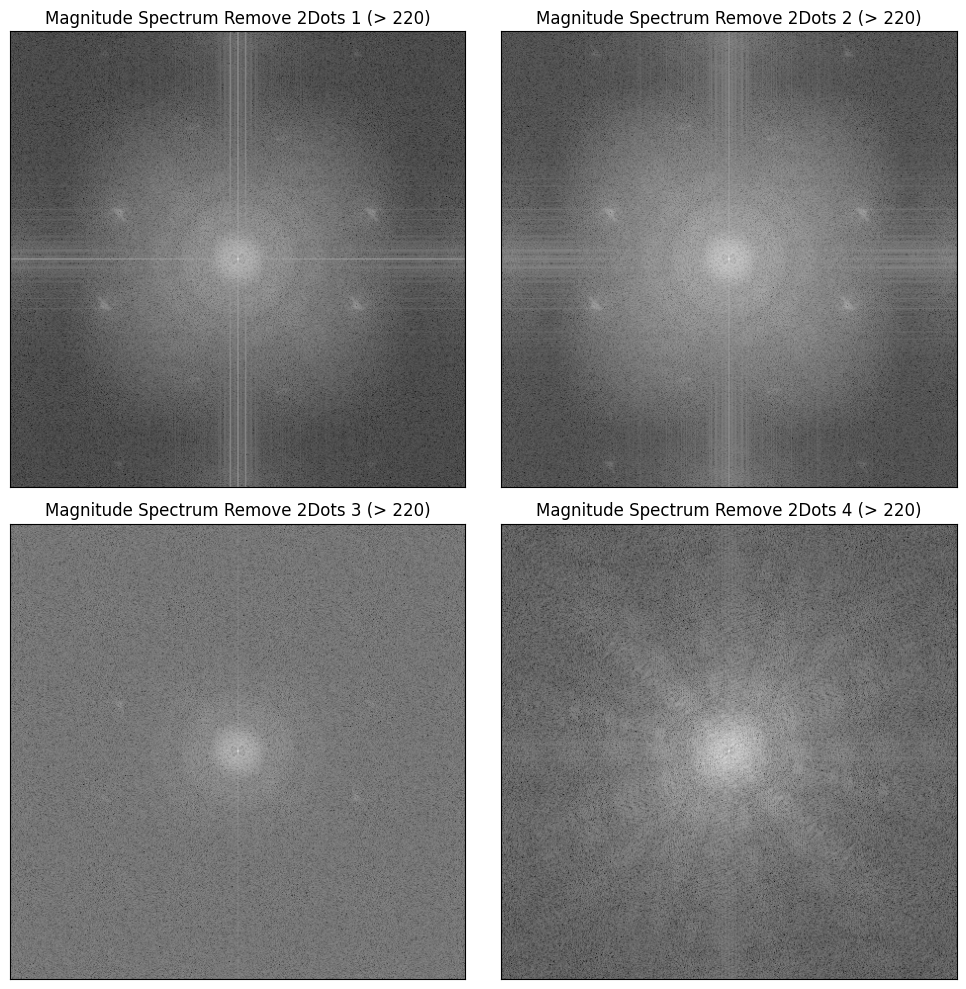

In [63]:
threshold = 220
plt.figure(figsize=(10,10))
filtered_magnitude_spectrum_copy_list = []
filtered_magnitude_spectrum_remove_center_copy_list = []
final_magnitude_spectrum = []

for i in range (num_images):
    dft_shift = dft_shift_list_copy[i]                                                                                    
    magnitude_spectrum = magnitude_spectrum_list_copy[i]   
    
    # chuyển về 0->255 để đặt ngưỡng cho dễ     
    magnitude_spectrum_nor = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)                               
    mask = magnitude_spectrum_nor > threshold
    # print(mask)
    # Tạo một hình ảnh mới để hiển thị các điểm được giữ lại
    filtered_magnitude_spectrum_nor = np.zeros_like(magnitude_spectrum_nor)
    filtered_magnitude_spectrum_nor[mask] = magnitude_spectrum_nor[mask]

    # quay về log cho đồng bộ, + 1 đề phòng trường hợp log 0
    filtered_magnitude_spectrum = np.log(filtered_magnitude_spectrum_nor + 1)                                         
    filtered_magnitude_spectrum_copy_list.append(filtered_magnitude_spectrum)
    
# print("filtered_magnitude_spectrum shape:", filtered_magnitude_spectrum.shape)
# print("mask_center_new shape:", mask_center_new.shape)
'''che điểm sáng center'''
for i in range(num_images):
    filtered_magnitude_spectrum = filtered_magnitude_spectrum_copy_list[i]
    filtered_magnitude_spectrum = filtered_magnitude_spectrum * mask_center_new
    filtered_magnitude_spectrum_remove_center_copy_list.append(filtered_magnitude_spectrum)
    
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(filtered_magnitude_spectrum, cmap='gray')
    plt.title(f'Filtered Magnitude Spectrum{i+1} (> 220)')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
# lấy ảnh magnitude spectrum ban đầu trừ đi ảnh này:
print("Shape of magnitude_spectrum[i]:", magnitude_spectrum_list[1].shape)
print("Shape of filtered_magnitude_spectrum_remove_center[i]:", filtered_magnitude_spectrum_remove_center_copy_list[1].shape)
for i in range(num_images):
    sub = cv2.subtract(magnitude_spectrum_list[i], filtered_magnitude_spectrum_remove_center_copy_list[i])
    final_magnitude_spectrum.append(sub)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(sub, cmap='gray')
    plt.title(f'Magnitude Spectrum Remove 2Dots {i+1} (> 220)')
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()
    
    
    

#### Áp dụng cho ảnh gốc

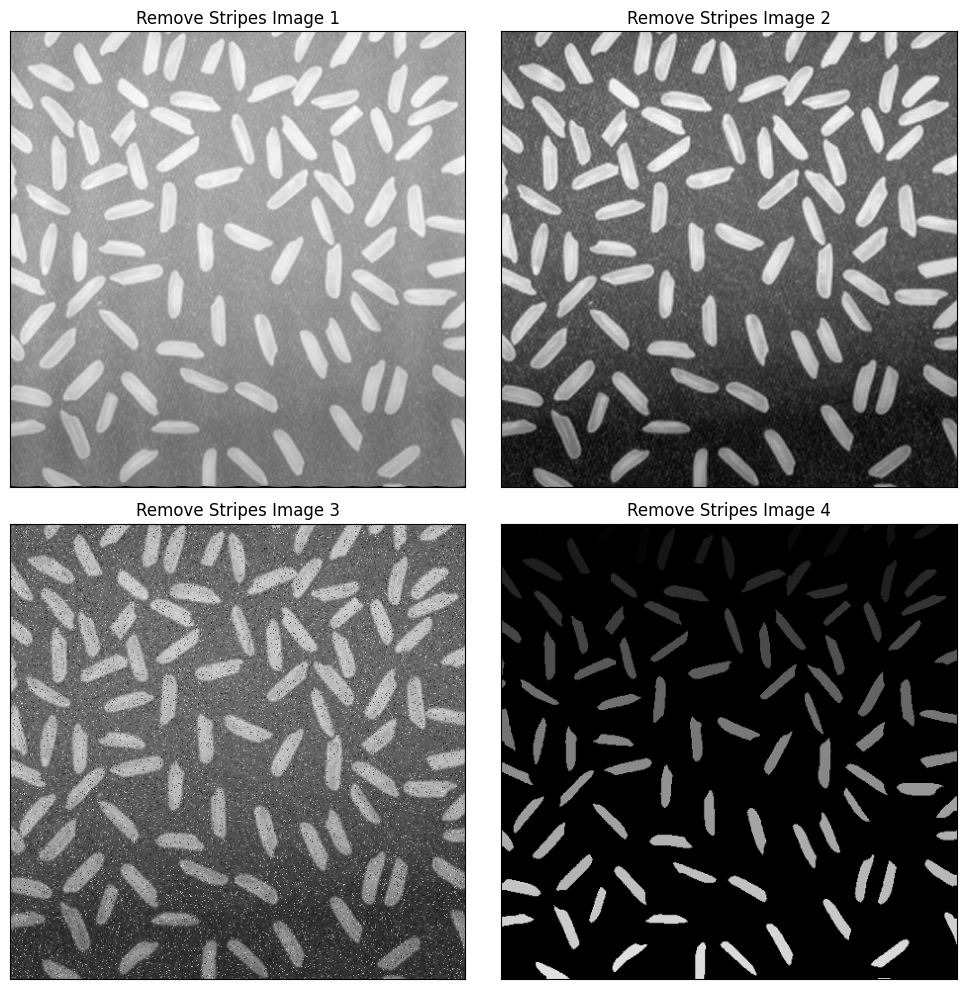

In [64]:
remove_stripes = []
filtered_mask = np.zeros_like(filtered_magnitude_spectrum_remove_center_copy_list[0])
plt.figure(figsize=(10, 10))
for i in range(num_images):
    filtered_magnitude_spectrum = filtered_magnitude_spectrum_remove_center_copy_list[i]
    
    # Chuẩn hóa filtered_magnitude_spectrum về dải [0, 1]
    normalized_spectrum = cv2.normalize(filtered_magnitude_spectrum, None, 0, 1, cv2.NORM_MINMAX)
    
    '''Tạo mask nhị phân từ filtered_magnitude_spectrum (giá trị > threshold -> giữ lại)'''
    threshold_value = 0.5  # Bạn có thể điều chỉnh giá trị này
    filtered_mask = (normalized_spectrum > threshold_value).astype(np.float32)
    inverted_mask = 1 - filtered_mask[..., np.newaxis]
    # flitered_mask = 1 - filtered_mask
    
    # plt.figure(figsize=(5, 5))
    # plt.imshow(inverted_mask, cmap='gray')
    # plt.title(f"Mask for Image {i+1}")
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    
    ''' Áp dụng mask lên dft_shift '''
    filtered_dft_shift = dft_shift_list[i] * inverted_mask  # Nhân với mask (có cùng shape)
    
    
    '''Dịch ngược về góc và thực hiện IDFT'''
    f_ishift = np.fft.ifftshift(filtered_dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    cv2.normalize(img_back, img_back, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    remove_stripes.append(img_back)
    
    # Hiển thị ảnh tái tạo
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(img_back, cmap='gray')
    plt.title(f"Remove Stripes Image {i+1}")
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

    

### 3.Gamma Filter Images

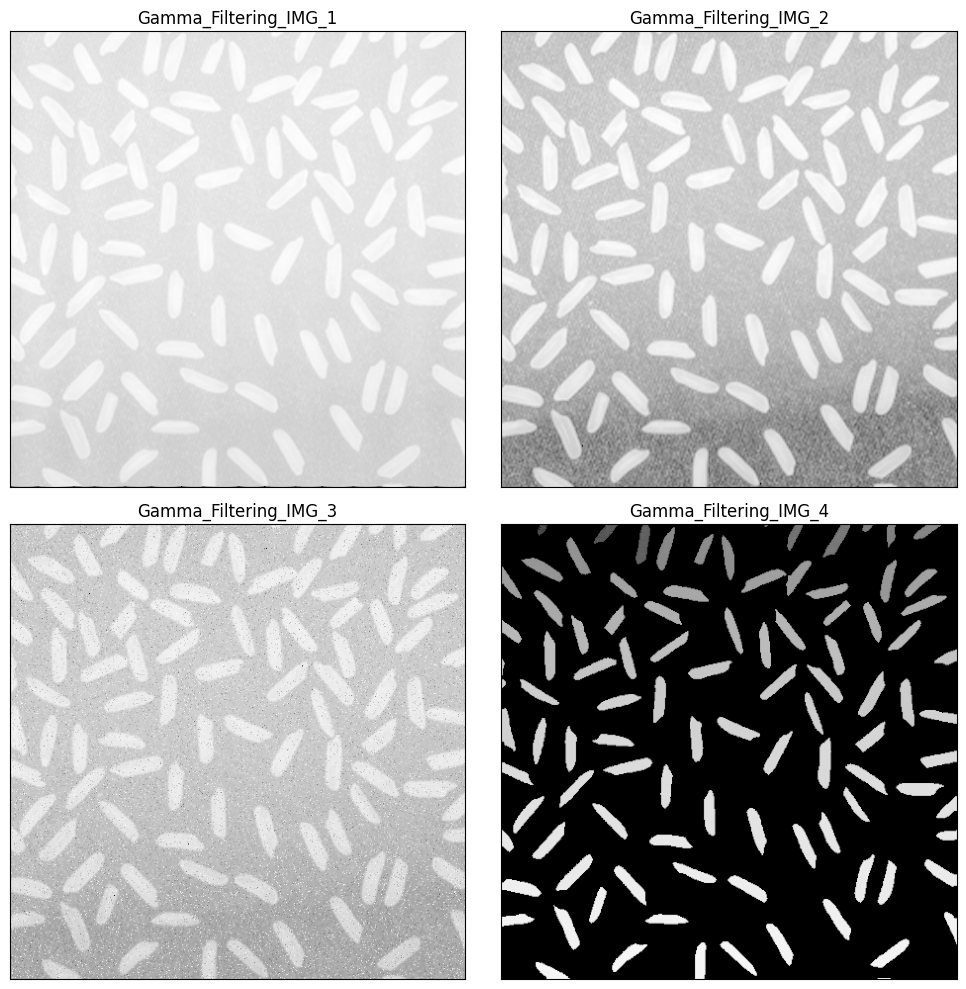

In [65]:
gamma = 0.25
gamma_filter_images = []
plt.figure(figsize=(10,10))
table = np.array([((j / 255.0) ** gamma) * 255 for j in np.arange(0, 256)]).astype("uint8")
for i in range (num_images):
    # apply gamma correction using the lookup table
    gamma_image =  cv2.LUT(remove_stripes[i], table)
    gamma_filter_images.append(gamma_image)
    
    plt.subplot(num_rows, num_columns, i + 1)
    # plt.imshow(histogram_equalize, cmap='gray')
    plt.imshow(gamma_image, cmap='gray')
    plt.title(f'Gamma_Filtering_IMG_{i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 4.Remove salt and pepper noise

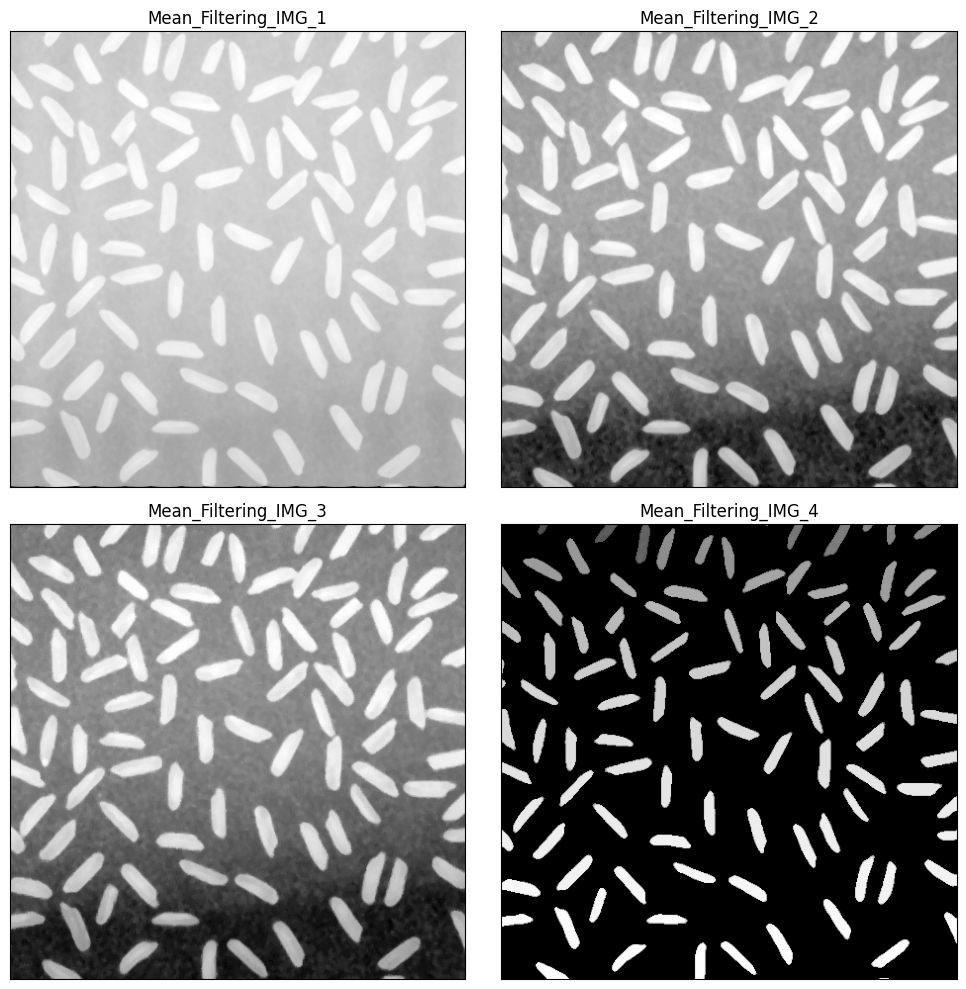

In [66]:
plt.figure(figsize=(10,10))
spp_removal_image = []
for i in range (num_images):
    # Apply mean filtering
    mean_image = cv2.medianBlur(gamma_filter_images[i],5)
    spp_removal_image.append(mean_image)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f'Mean_Filtering_IMG_{i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 5.Change to Binary images

In [67]:
# '''Thử cacs cặp giá trị blocksize, C khác nhau, từ đó chọn ra giá trị tốt nhất'''
# block_sizes = [47, 51,57,61,81]  # Các giá trị lẻ để thử
# C_values = [-5, 0,3]      # Các giá trị của C để thử

# # Số lượng ảnh
# num_images = len(spp_removal_image)

# # Duyệt qua các giá trị block size và C
# for block_size in block_sizes:
#     for C in C_values:
#         plt.figure(figsize=(10,10))
#         # Tạo figure mới cho từng cặp block size và C
#         fig, axes = plt.subplots(1, 4, figsize=(20, 5))
#         fig.suptitle(f'Block Size: {block_size}, C: {C}', fontsize=16)

#         # Duyệt qua từng ảnh và áp dụng adaptive threshold
#         for i in range(4):  # Hiển thị 4 ảnh đầu tiên
            
#             img = spp_removal_image[i]
#             img = cv2.GaussianBlur(img, (7, 7), 0) 
#             # Áp dụng adaptive threshold
#             th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                          cv2.THRESH_BINARY, blockSize=block_size, C=C)

#             # Hiển thị kết quả
#             axes[i].imshow(th3, cmap='gray')
#             axes[i].set_title(f'Image {i + 1}')
#             axes[i].axis('off')

#         plt.tight_layout()
#         plt.subplots_adjust(top=0.85)
#         plt.show()

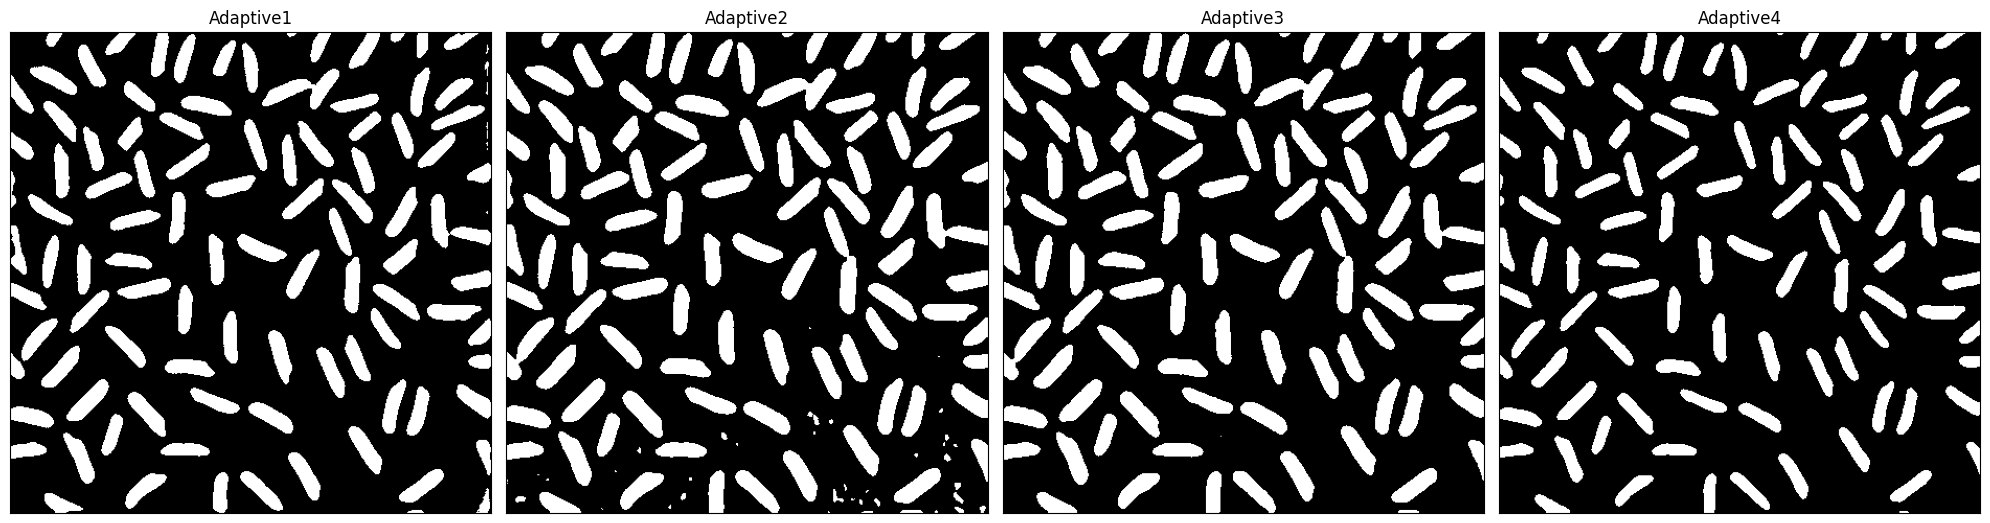

In [68]:
# ret,thresh = cv2.threshold(gray,70,255,0)
adpt_thresh_images = []
plt.figure(figsize=(20,10))
binary_images = []

for i in range (num_images):
    img = spp_removal_image[i]
    # Apply threshold
    img = cv2.GaussianBlur(img, (7, 7), 0) 
    th3 = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blockSize=61,C=-5)
    adpt_thresh_images.append(th3)
    
    plt.subplot(num_rows//2, num_columns*2, i + 1)
    plt.imshow(th3, cmap='gray')
    plt.title(f'Adaptive{i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 6.Closing,Opening

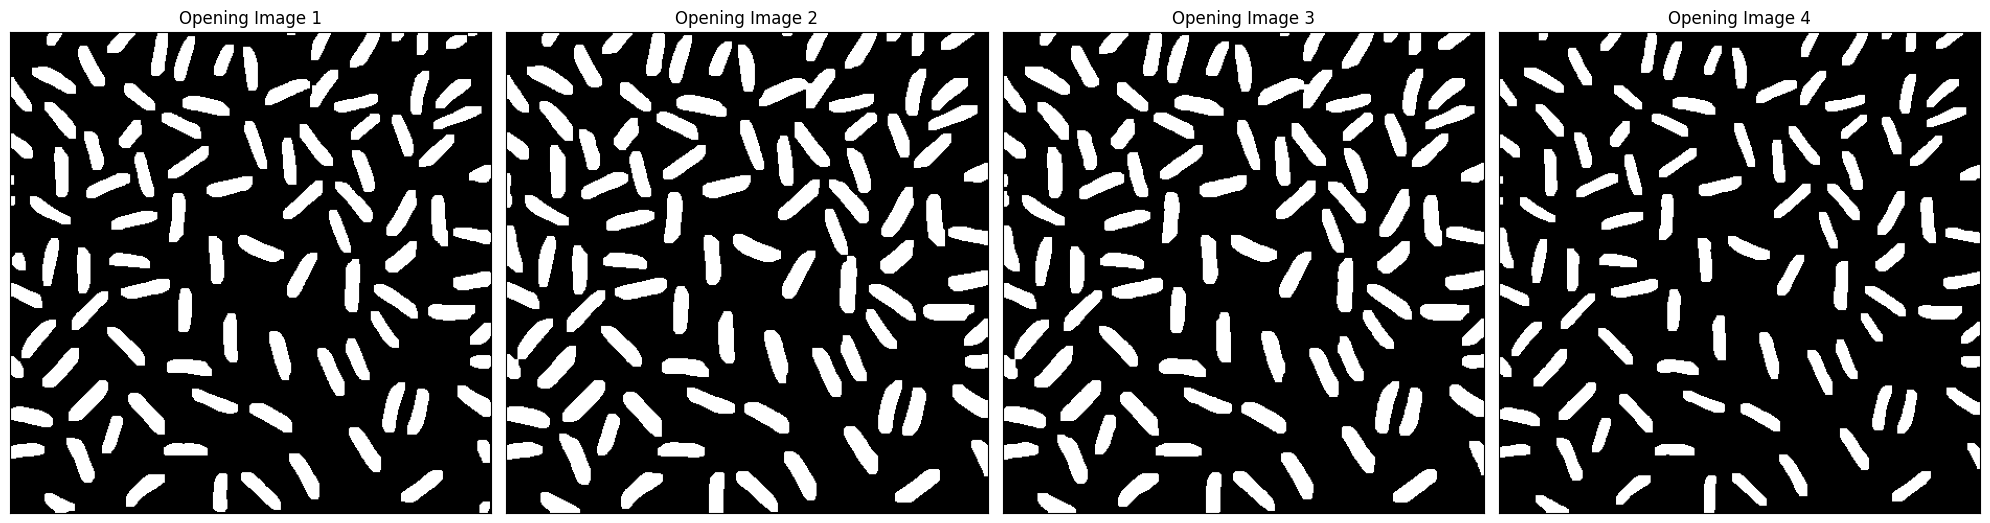

In [69]:
opened_images = []
plt.figure(figsize=(20,10))
kernel = np.ones((3, 3), np.uint8)
for i in range(num_images):
    
    eroded_image = cv2.erode(adpt_thresh_images[i], kernel, iterations=3)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=3)
    opened_images.append(dilated_image)
    plt.subplot(num_rows//2, num_columns*2, i + 1)
    plt.imshow(dilated_image, cmap='gray',)
    plt.title(f'Opening Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

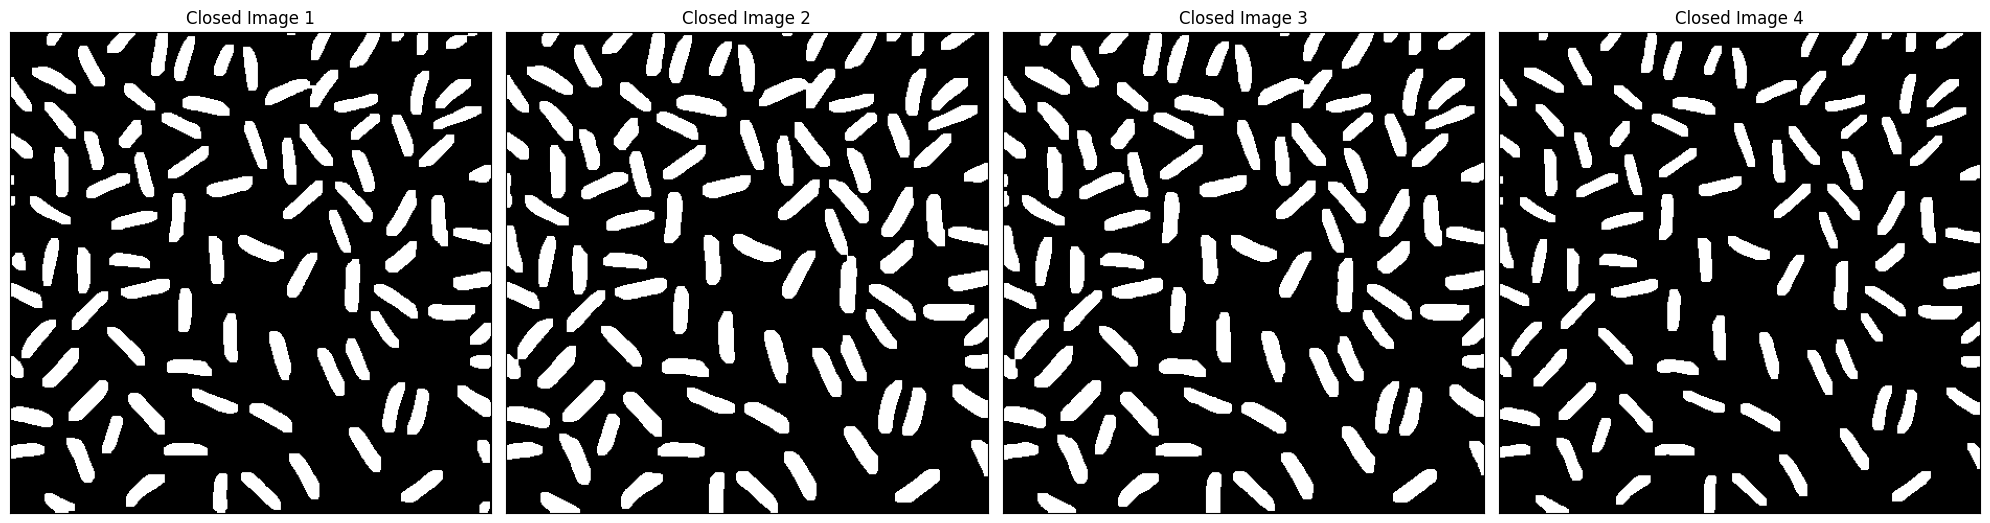

In [70]:
closed_image = []
plt.figure(figsize=(20,10))
kernel = np.ones((3,3), np.uint8)
for i in range(num_images):
    dilated_image = cv2.dilate(opened_images[i], kernel, iterations=1)
    eroded_image = cv2.erode(dilated_image,kernel, iterations=1)
    closed_image.append(eroded_image)
    plt.subplot(num_rows//2, num_columns*2, i + 1)
    plt.imshow(eroded_image, cmap='gray',)
    plt.title(f'Closed Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
closed_image_copy = [copy.deepcopy(i) for i in closed_image]

In [71]:
# for i in range(num_images):
#     binary_image = closed_image[i]

#     # Bước 1: Tìm chắc chắn vùng nền và tiền cảnh
#     kernel = np.ones((5, 5), np.uint8)
#     sure_bg = cv2.dilate(binary_image, kernel, iterations=3)  # Nền chắc chắn
#     sure_fg = cv2.erode(binary_image, kernel, iterations=3)  # Tiền cảnh chắc chắn
#     unknown = cv2.subtract(sure_bg, sure_fg)  # Vùng không xác định

#     # Bước 2: Gán nhãn cho vùng tiền cảnh"
#     _, markers = cv2.connectedComponents(sure_fg)
#     markers = markers + 1  # Đảm bảo nhãn 0 là nền
#     markers[unknown == 255] = 0  # Đánh dấu vùng không xác định

#     # Bước 3: Áp dụng Watershed
#     colored_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
#     cv2.watershed(colored_image, markers)

#     # Vẽ kết quả
#     colored_image[markers == -1] = [0, 0, 255]  # Đường viền màu đỏ

#     # Connected Components sau khi Watershed
#     num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

#     print(f'Số lượng hạt gạo đếm được sau Watershed: {num_labels - 1}')
#     plt.figure(figsize=(10, 10))
#     plt.subplot(num_rows, num_columns, i+1)
#     plt.imshow(colored_image[..., ::-1])  # Hiển thị ảnh kết quả
#     plt.title('Watershed Segmentation')
#     plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()


### 7.Counting


In [92]:
# bin_img = closed_image_copy[3]
# plt.imshow(bin_img, 'gray')  #
# plt.title('Connected Components')
# plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

# --------------------------------------------------------
# kernel = np.ones((3,3),np.uint8)
# sure_bg = cv2.dilate(bin_img,kernel,iterations=25)
# plt.imshow(sure_bg, 'gray')  #
# plt.title('Connected Components')
# plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

# # Finding sure foreground area
# dist_transform = cv2.distanceTransform(bin_img,cv2.DIST_L2,5)
# plt.imshow(dist_transform, 'gray')  #
# plt.title('Connected Components')
# plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

# ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
# sure_fg = np.uint8(sure_fg)
# plt.imshow(sure_fg, 'gray')  #
# plt.title('Connected Components')
# plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

# ----------------------------------------------------------

# unknown = cv2.subtract(sure_bg,sure_fg)
# plt.imshow(unknown, 'gray')  #
# plt.title('Connected Components')
# plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

# ------------------------------------------------------------

# num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(sure_fg, connectivity=8)
    
# for j in range(1, num_labels):  # Bỏ qua nhãn 0 (nền)
#     x, y, w, h, area = stats[j]
#     cx, cy = centroids[j]

#     # Vẽ bounding box xung quanh vật thể
#     cv2.rectangle(sure_fg, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     # Vẽ tâm
#     cv2.circle(sure_fg, (int(cx), int(cy)), 5, (0, 0, 255), -1)

#     # Ghi số thứ tự lên vật thể
#     cv2.putText(sure_fg, str(j), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# # Hiển thị số lượng vật thể
# print(f'Số lượng hạt gạo đếm được: {num_labels - 1}')

# # Hiển thị ảnh kết quả
# plt.figure(figsize=(10, 10))
# plt.imshow(sure_fg,'gray')  # Chuyển từ BGR sang RGB để hiển thị
# plt.title('Connected Components')
# plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()




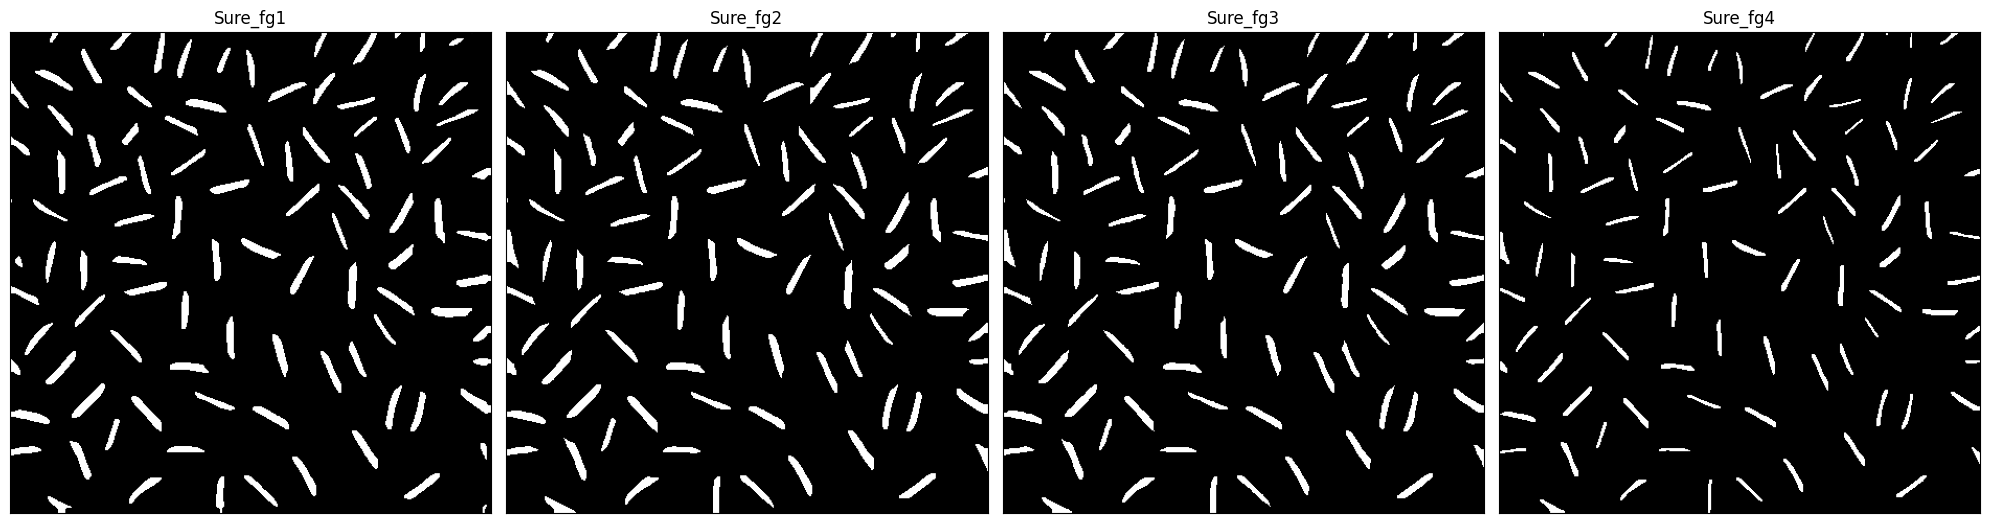

In [93]:
plt.figure(figsize=(20, 10))
sure_bg_list = []
dist_transform_list = []
sure_fg_list = []
unknown_list = []
for i in range(num_images):
    img = closed_image_copy[i]
    kernel = np.ones((3,3),np.uint8)
    sure_bg = cv2.dilate(img,kernel,iterations=25)
    sure_bg_list.append(sure_bg)
    # plt.subplot(num_rows//2,num_columns*2,i+1)
    # plt.imshow(sure_bg, 'gray')  #
    # plt.title(f'Sure BG {i+1}')
    # plt.xticks([]), plt.yticks([])
    # plt.tight_layout()
    # plt.show()

# Finding sure foreground area
    dist_transform = cv2.distanceTransform(img,cv2.DIST_L2,5)
    dist_transform_list.append(dist_transform)
    # plt.subplot(num_rows//2,num_columns*2,i+1)
    # plt.imshow(dist_transform, 'gray')  #
    # plt.title(f'Dist_transform {i+1}')
    # plt.xticks([]), plt.yticks([])
    # plt.tight_layout()
    # plt.show()

    ret, sure_fg = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    sure_fg_list.append(sure_fg)
    plt.subplot(num_rows//2,num_columns*2,i+1)
    plt.imshow(sure_fg, 'gray')  #
    plt.title(f'Sure_fg{i+1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


Num rice grain of image 1: 102
Num rice grain of image 2: 100
Num rice grain of image 3: 100
Num rice grain of image 4: 97


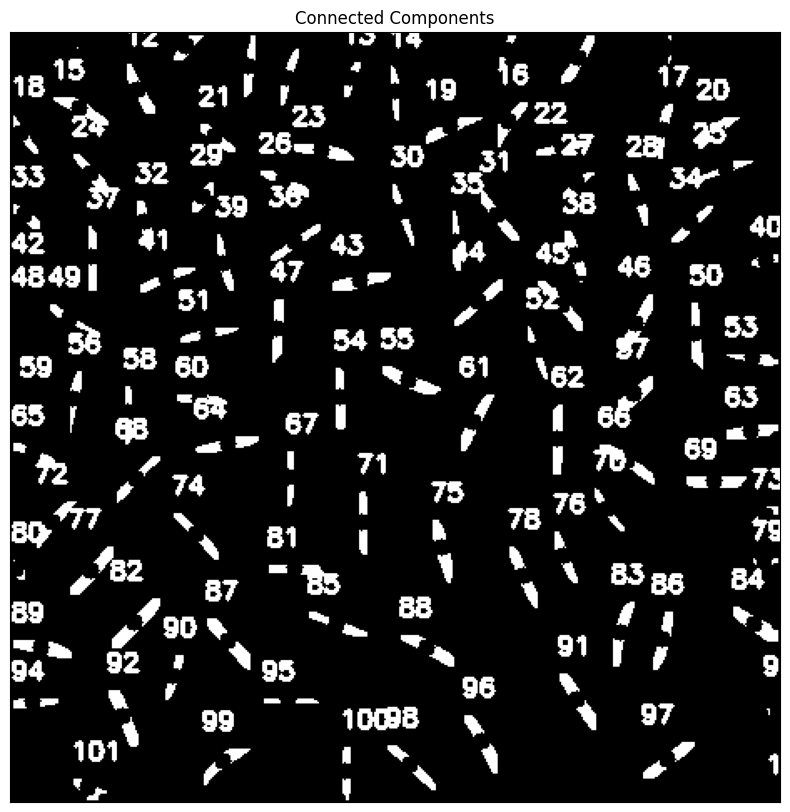

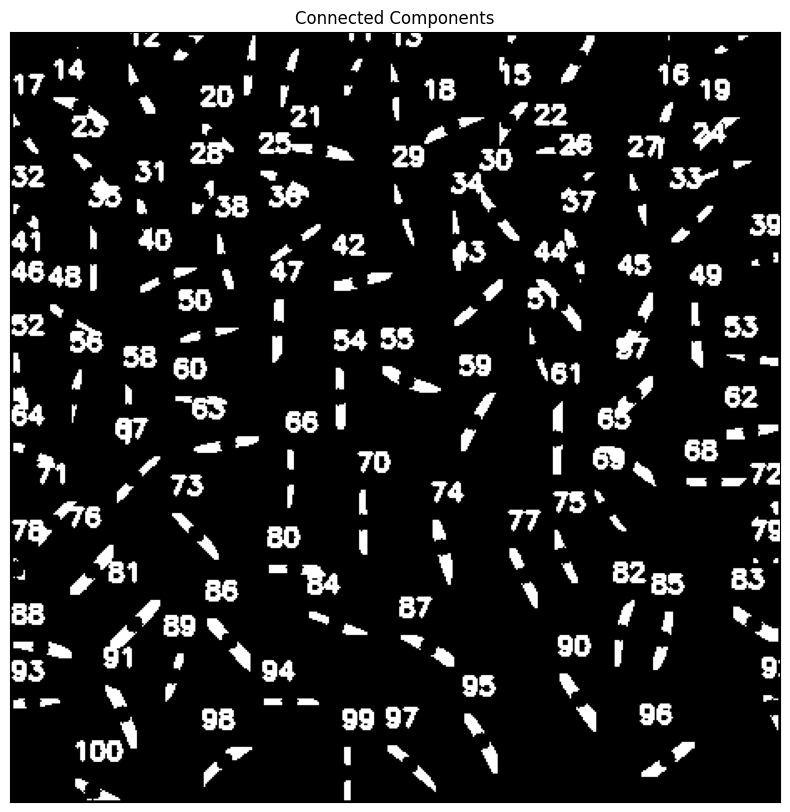

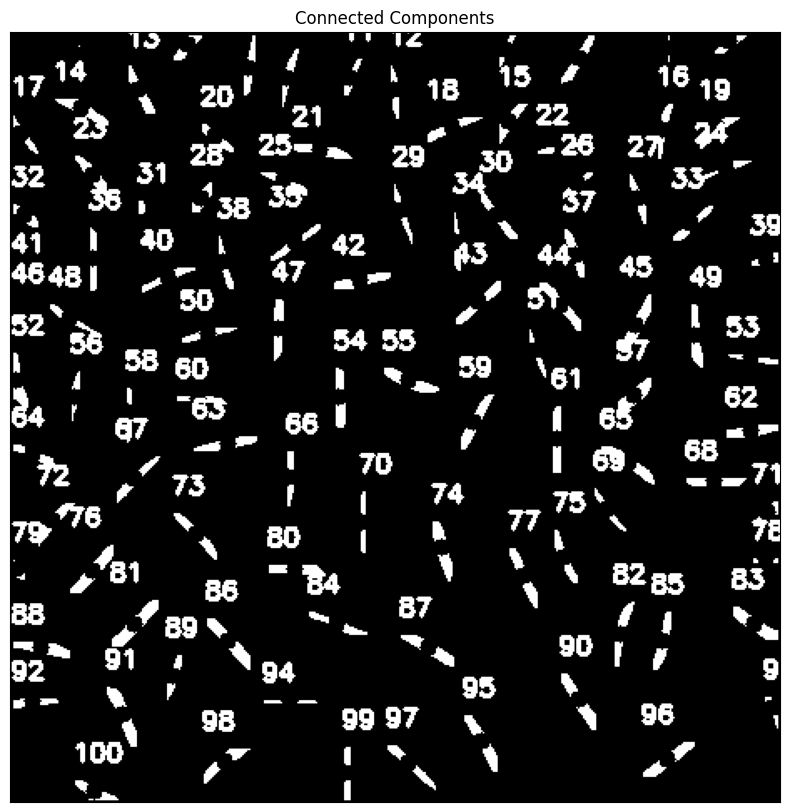

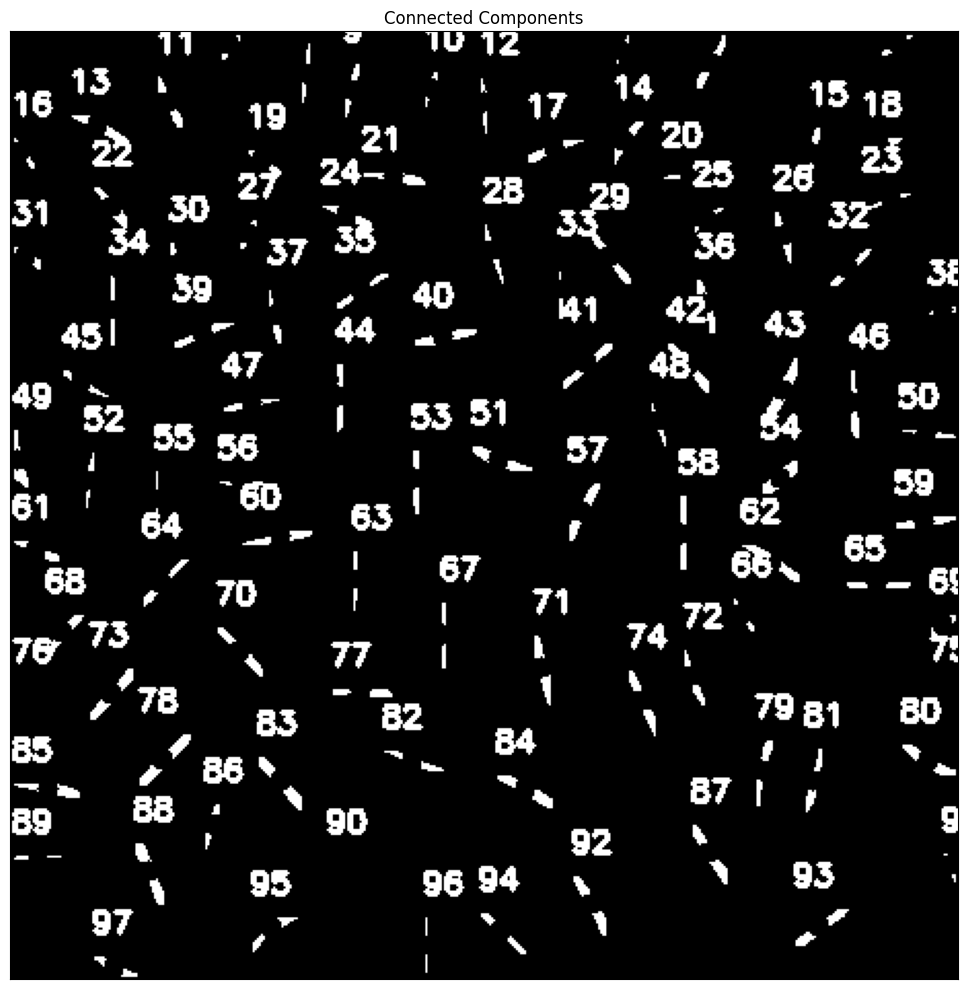

In [94]:
for i in range(num_images):
    # if i ==3:
    #     plt.imshow(sure_fg_list[i], 'gray')
    #     plt.title('Connected Components')
    #     plt.xticks([]), plt.yticks([])
    #     plt.tight_layout()
    #     plt.show()
    #     break
    sure_fg_here = sure_fg_list[i]
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(sure_fg_here, connectivity=8)
    
    for j in range(1, num_labels):  # Bỏ qua nhãn 0 (nền)
        x, y, w, h, area = stats[j]
        cx, cy = centroids[j]

        # Vẽ bounding box xung quanh gạo
        cv2.rectangle(sure_fg_here, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Vẽ tâm
        cv2.circle(sure_fg_here, (int(cx), int(cy)), 5, (0, 0, 255), -1)

        # Ghi số thứ tự lên gạo
        cv2.putText(sure_fg_here, str(j), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Hiển thị số lượng vật thể
    print(f'Num rice grain of image {i+1}: {num_labels - 1}')

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(10, 10))
    plt.imshow(sure_fg_here,'gray')  # Chuyển từ BGR sang RGB để hiển thị
    plt.title('Connected Components')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()